# Armonización datos satelitales de Sentinel-2 y Landsat-8, suavizacion e imputacion de datos diarios

Entrega 2 Taller de Proyecto

Estefanía Pizarro Arias

Armonización de datos satelitales según metodo implementado por Beeri et al., (2020). Se necesita tener datos diarios de NDVI puesto que es la variable que ayudará responder la pregunta de valor planteada

*Cargar librerias y datos*

In [ ]:
# Cargar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

In [ ]:
from google.colab import drive # Ocupar y obtener los datos desde nuestro Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leer serie Sentinel-2
df_s2 = pd.read_csv("/content/drive/MyDrive/Diplomado_DS/Segunda_entrega/Data_set/S2_time_series.csv")
df_s2['satelite'] = 'S2'
df_s2.head(5)

,fid,date,NDVI,SAVI,SLAVI,satelite
0,3,20190802,0.138857,0.103552,0.526171,S2
1,3,20190921,0.194700,0.113248,0.579676,S2
2,3,20191021,0.267217,0.163980,0.687379,S2
3,3,20191105,0.271702,0.172450,0.725546,S2
4,3,20191110,0.285384,0.182267,0.734545,S2


In [ ]:
# Leer serie Landsat-8
df_l8 =  pd.read_csv("/content/drive/MyDrive/Diplomado_DS/Segunda_entrega/Data_set/L8_time_series.csv")
df_l8['satelite'] = 'L8'
df_l8.head(5)

,fid,date,NDVI,SAVI,SLAVI,satelite
0,3,20190803,0.230871,0.113434,0.619229,L8
1,3,20190920,0.209399,0.119403,0.602207,L8
2,3,20191006,0.233900,0.136702,0.661431,L8
3,3,20191022,0.288078,0.173846,0.726706,L8
4,3,20191107,0.304539,0.191003,0.774466,L8


*Preprocesamiento y filtro de fechas (temporadas)*

In [ ]:
# Convertir la columna 'date' a tipo datetime en ambos data frame
df_l8['date'] = pd.to_datetime(df_l8['date'], format='%Y%m%d')
df_s2['date'] = pd.to_datetime(df_s2['date'], format='%Y%m%d')

In [ ]:
# Filtro temporadas para landsat (3 temporadas de estudio)

# Tempoarada 1
fi_t1 = pd.to_datetime('2021-09-01')
ff_t1 = pd.to_datetime('2022-04-30')
l8_1 = df_l8[(df_l8['date'] >= fi_t1) & (df_l8['date'] <= ff_t1)]
l8_1['season'] = '21-22'

# Temporada 2
fi_t2 = pd.to_datetime('2022-09-01')
ff_t2 = pd.to_datetime('2023-04-30')
l8_2 = df_l8[(df_l8['date'] >= fi_t2) & (df_l8['date'] <= ff_t2)]
l8_2['season'] = '22-23'

# Temporada 3
fi_t3 = pd.to_datetime('2023-09-01')
ff_t3 = pd.to_datetime('2024-04-30')
l8_3 = df_l8[(df_l8['date'] >= fi_t3) & (df_l8['date'] <= ff_t3)]
l8_3['season'] = '23-24'

<ipython-input-8-41315831ace9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l8_1['season'] = '21-22'
<ipython-input-8-41315831ace9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l8_2['season'] = '22-23'
<ipython-input-8-41315831ace9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [ ]:
# Filtro temporadas para sentinel  (3 temporadas de estudio)

# Tempoarada 1
fi_t1 = pd.to_datetime('2021-09-01')
ff_t1 = pd.to_datetime('2022-04-30')
s2_1 = df_s2[(df_s2['date'] >= fi_t1) & (df_s2['date'] <= ff_t1)]
s2_1['season'] = '21-22'

# Temporada 2
fi_t2 = pd.to_datetime('2022-09-01')
ff_t2 = pd.to_datetime('2023-04-30')
s2_2 = df_s2[(df_s2['date'] >= fi_t2) & (df_s2['date'] <= ff_t2)]
s2_2['season'] = '22-23'

# Temporada 3
fi_t3 = pd.to_datetime('2023-09-01')
ff_t3 = pd.to_datetime('2024-04-30')
s2_3 = df_s2[(df_s2['date'] >= fi_t3) & (df_s2['date'] <= ff_t3)]
s2_3['season'] = '23-24'

<ipython-input-9-4d81b860e763>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2_1['season'] = '21-22'
<ipython-input-9-4d81b860e763>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2_2['season'] = '22-23'
<ipython-input-9-4d81b860e763>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [ ]:
# Unir los DataFrames serie temporal de indices de ambos satelites
df_combined = pd.concat([l8_1, l8_2, l8_3, s2_1, s2_2, s2_3])
df_combined.head(15)

,fid,date,NDVI,SAVI,SLAVI,satelite,season
27,3,2021-09-09,0.237483,0.134950,0.650637,L8,21-22
28,3,2021-10-11,0.435253,0.263375,1.028028,L8,21-22
29,3,2021-10-27,0.463394,0.282027,1.136663,L8,21-22
30,3,2021-11-12,0.491492,0.297585,1.215650,L8,21-22
31,3,2021-11-28,0.514517,0.312552,1.272928,L8,21-22
32,3,2021-12-14,0.547521,0.324882,1.412025,L8,21-22
33,3,2021-12-30,0.559357,0.333455,1.486634,L8,21-22
34,3,2022-01-15,0.538398,0.316008,1.431089,L8,21-22
35,3,2022-01-31,0.534926,0.304274,1.404639,L8,21-22
36,3,2022-02-16,0.523373,0.291564,1.365003,L8,21-22


In [ ]:
# Ordenar el DataFrame combinado por fecha
df_combined = df_combined.sort_values(by=['fid','date']).reset_index(drop=True)
df_combined

,fid,date,NDVI,SAVI,SLAVI,satelite,season
0,3,2021-09-05,0.217803,0.118586,0.591818,S2,21-22
1,3,2021-09-09,0.237483,0.134950,0.650637,L8,21-22
2,3,2021-09-20,0.291247,0.163145,0.707733,S2,21-22
3,3,2021-09-30,0.369712,0.219599,0.834174,S2,21-22
4,3,2021-10-05,0.389892,0.234640,0.896868,S2,21-22
...,...,...,...,...,...,...,...
9325,127,2024-03-28,0.550256,0.263000,1.356794,S2,23-24
9326,127,2024-04-07,0.556608,0.259176,1.371931,S2,23-24
9327,127,2024-04-17,0.550523,0.255337,1.344788,S2,23-24
9328,127,2024-04-26,0.666186,0.130683,1.458732,L8,23-24


En esta parte se identifica que como la revisita de los satelites no es regular y no necesariamente calza con el inicio de cada mes, al realizar el filtro de fechas el comienzo e inicio de temporada no coinciden con el 01 de septiemte o el 30 de abril como está definido.

In [ ]:
# eliminar duplicados en caso que satelites pasen el mismo dia
df_combined = df_combined.drop_duplicates(subset=['fid', 'season', 'date'], keep='first')
df_combined

,fid,date,NDVI,SAVI,SLAVI,satelite,season
0,3,2021-09-05,0.217803,0.118586,0.591818,S2,21-22
1,3,2021-09-09,0.237483,0.134950,0.650637,L8,21-22
2,3,2021-09-20,0.291247,0.163145,0.707733,S2,21-22
3,3,2021-09-30,0.369712,0.219599,0.834174,S2,21-22
4,3,2021-10-05,0.389892,0.234640,0.896868,S2,21-22
...,...,...,...,...,...,...,...
9325,127,2024-03-28,0.550256,0.263000,1.356794,S2,23-24
9326,127,2024-04-07,0.556608,0.259176,1.371931,S2,23-24
9327,127,2024-04-17,0.550523,0.255337,1.344788,S2,23-24
9328,127,2024-04-26,0.666186,0.130683,1.458732,L8,23-24


*Función de suavizado de datos (harmonizar datos satelitales)*

In [ ]:
# Técnica de suavizado que combina regresiones locales ponderadas para crear una curva suave que se ajusta a los datos.
# Aplicar suavizado LOESS (mismo proceso que Locally Weighted Regression Algorithm) y luego convertir a data frame

def apply_loess(group):
    # Suavizado para NDVI
    loess_ndvi = lowess(group['NDVI'], group['date'], frac=0.2)
    smoothed_ndvi = pd.DataFrame({
        'date': pd.to_datetime(loess_ndvi[:, 0]),
        'smoothed_ndvi': loess_ndvi[:, 1]
    })

    # Suavizado para SAVI
    loess_savi = lowess(group['SAVI'], group['date'], frac=0.2)
    smoothed_savi = pd.DataFrame({
        'date': pd.to_datetime(loess_savi[:, 0]),
        'smoothed_savi': loess_savi[:, 1]
    })

    # Suavizado para SLAVI
    loess_slavi = lowess(group['SLAVI'], group['date'], frac=0.2)
    smoothed_slavi = pd.DataFrame({
        'date': pd.to_datetime(loess_slavi[:, 0]),
        'smoothed_slavi': loess_slavi[:, 1]
    })

    # Combinar los resultados
    smoothed = smoothed_ndvi.merge(smoothed_savi, on='date').merge(smoothed_slavi, on='date')
    smoothed['fid'] = group['fid'].iloc[0]
    smoothed['season'] = group['season'].iloc[0]  # Agregar la columna season

    return smoothed

In [ ]:
# Aplicar la función a cada grupo (en este caso es para cada fid por temporada por separado)
smoothed_dfs = df_combined.groupby(['fid','season']).apply(apply_loess).reset_index(drop=True)
smoothed_dfs

,date,smoothed_ndvi,smoothed_savi,smoothed_slavi,fid,season
0,2021-09-05,0.214044,0.116923,0.590657,3,21-22
1,2021-09-09,0.237488,0.132333,0.630302,3,21-22
2,2021-09-20,0.302091,0.174907,0.741117,3,21-22
3,2021-09-30,0.360164,0.212763,0.838589,3,21-22
4,2021-10-05,0.384860,0.229645,0.891716,3,21-22
...,...,...,...,...,...,...
8880,2024-03-28,0.565807,0.277246,1.445219,127,23-24
8881,2024-04-07,0.556726,0.234501,1.392806,127,23-24
8882,2024-04-17,0.549786,0.175671,1.397209,127,23-24
8883,2024-04-26,0.544089,0.124993,1.406737,127,23-24


*Creación de rango de datos diarios para interpolación*

In [ ]:
# Crear un DataFrame vacío para almacenar los resultados
result_df = pd.DataFrame()

En esta parte es donde se genera un 'problema' (oportunidad de mejora). Debe optimizarse el código para lograr definir de forma estándar el inicio y final de temporada, y no que tome el mínimo y máximo de cada serie, puesto que, como se vio previamente, el comienzo no esta supeditado al 1 de septiembre y su final al 30 de abril.

In [ ]:
# Iterar sobre cada temporada
for season in smoothed_dfs['season'].unique():
    # Filtrar datos para la temporada
    df_season = smoothed_dfs[smoothed_dfs['season'] == season]

    # Iterar sobre cada fid en la temporada
    for fid in df_season['fid'].unique():
        # Filtrar datos para el fid actual dentro de la temporada
        df_id = df_season[df_season['fid'] == fid]

        # Crear rango diario de fechas para el fid
        # AQUI, AL CREAR EL RANGO DIARIO DE INTERPOLACIÓN DEBE AJUSTARSE A VALORES ESTANDAR DE INICIO Y TERMINO
        date_range = pd.date_range(start=df_id['date'].min(), end=df_id['date'].max(), freq='D')
        interp_df = pd.DataFrame(date_range, columns=['date'])

        # Realizar el merge usando outer join para mantener todas las fechas
        merged_df = pd.merge(interp_df, df_id, on='date', how='outer')

        # Rellenar los valores NA en la columna 'fid' con el fid actual
        merged_df['fid'] = merged_df['fid'].fillna(fid)
        # Rellenar los valores NA en la columna 'season' con el valor correspondiente del DataFrame original
        merged_df['season'] = merged_df['season'].fillna(season)

        # Combinar el resultado con el DataFrame final
        result_df = pd.concat([result_df, merged_df])

# Restablecer el índice del DataFrame final
result_df = result_df.reset_index(drop=True)


In [ ]:
result_df

,date,smoothed_ndvi,smoothed_savi,smoothed_slavi,fid,season
0,2021-09-05,0.214044,0.116923,0.590657,3.0,21-22
1,2021-09-06,NaN,NaN,NaN,3.0,21-22
2,2021-09-07,NaN,NaN,NaN,3.0,21-22
3,2021-09-08,NaN,NaN,NaN,3.0,21-22
4,2021-09-09,0.237488,0.132333,0.630302,3.0,21-22
...,...,...,...,...,...,...
47368,2024-04-23,NaN,NaN,NaN,127.0,23-24
47369,2024-04-24,NaN,NaN,NaN,127.0,23-24
47370,2024-04-25,NaN,NaN,NaN,127.0,23-24
47371,2024-04-26,0.544089,0.124993,1.406737,127.0,23-24


*Interpolación diaria*

In [ ]:
# Función para aplicar interpolación a cada grupo
def interpolate_group(df, method='linear'):
    df = df.copy()
    df['ndvi_f'] = df['smoothed_ndvi'].interpolate(method=method)
    df['savi_f'] = df['smoothed_savi'].interpolate(method=method)
    df['slavi_f'] = df['smoothed_slavi'].interpolate(method=method)
    return df

In [ ]:
# Aplicar interpolación lineal a cada grupo
interpolated = result_df.groupby(['fid','season']).apply(interpolate_group, method='linear').reset_index(drop=True)
interpolated = interpolated[['fid','date','ndvi_f','savi_f','slavi_f','season']]
interpolated

,fid,date,ndvi_f,savi_f,slavi_f,season
0,3.0,2021-09-05,0.214044,0.116923,0.590657,21-22
1,3.0,2021-09-06,0.219905,0.120775,0.600568,21-22
2,3.0,2021-09-07,0.225766,0.124628,0.610479,21-22
3,3.0,2021-09-08,0.231627,0.128481,0.620391,21-22
4,3.0,2021-09-09,0.237488,0.132333,0.630302,21-22
...,...,...,...,...,...,...
47368,127.0,2024-04-23,0.545988,0.141886,1.403561,23-24
47369,127.0,2024-04-24,0.545355,0.136255,1.404620,23-24
47370,127.0,2024-04-25,0.544722,0.130624,1.405678,23-24
47371,127.0,2024-04-26,0.544089,0.124993,1.406737,23-24


Al generar el timeline de temporada, este se hace en relacion al fid y la fecha dentro de la temporada, esto genera discrepancia en la duración del ciclo de cada fid puesto que viene dado por la fecha otorgada por la primera y la última imagen satelital captada para la temporada.

In [ ]:
# Crear la columna con el número de día acumulado para cada fid por temporada
interpolated['timeline'] = interpolated.groupby(['fid','season']).cumcount()
interpolated

,fid,date,ndvi_f,savi_f,slavi_f,season,timeline
0,3.0,2021-09-05,0.214044,0.116923,0.590657,21-22,0
1,3.0,2021-09-06,0.219905,0.120775,0.600568,21-22,1
2,3.0,2021-09-07,0.225766,0.124628,0.610479,21-22,2
3,3.0,2021-09-08,0.231627,0.128481,0.620391,21-22,3
4,3.0,2021-09-09,0.237488,0.132333,0.630302,21-22,4
...,...,...,...,...,...,...,...
47368,127.0,2024-04-23,0.545988,0.141886,1.403561,23-24,221
47369,127.0,2024-04-24,0.545355,0.136255,1.404620,23-24,222
47370,127.0,2024-04-25,0.544722,0.130624,1.405678,23-24,223
47371,127.0,2024-04-26,0.544089,0.124993,1.406737,23-24,224


*Visualización ejemplo*

In [ ]:
# Serie interpolada
x = interpolated[['fid', 'date', 'ndvi_f']]
x = x[x['fid'] == 8]
x = x[(x['date'] >= '2022-09-01') & (x['date'] <= "2023-04-30")]

# Serie original
y = df_combined[['fid', 'date', 'NDVI','satelite']]
y = y[(y['date'] >= '2022-09-01') & (y['date'] <= "2023-04-30")]
y = y[y['fid'] == 8]

# Serie smoothed
z = smoothed_dfs[['fid', 'date', 'smoothed_ndvi']]
z = z[(z['date'] >= '2022-09-01') & (z['date'] <= "2023-04-30")]
z = z[z['fid'] == 8]

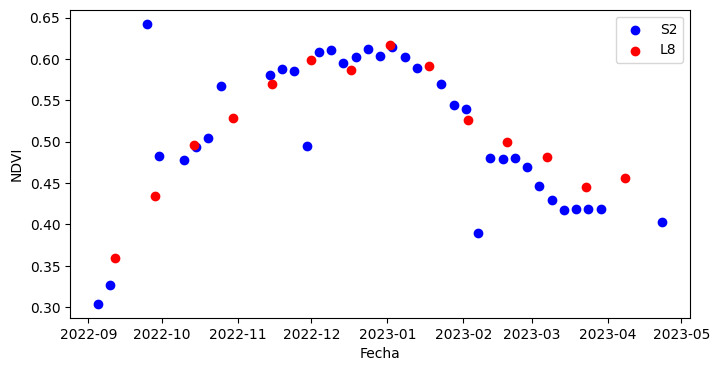

In [ ]:
# Grafica dato original cada satelite
plt.figure(figsize=(8, 4))

for satelite, color in zip(y['satelite'].unique(), ['blue', 'red']):
    subset = y[y['satelite'] == satelite]
    plt.scatter(subset['date'], subset['NDVI'], color=color, label=satelite)
plt.xlabel('Fecha')
plt.ylabel('NDVI')
plt.legend()
plt.show()

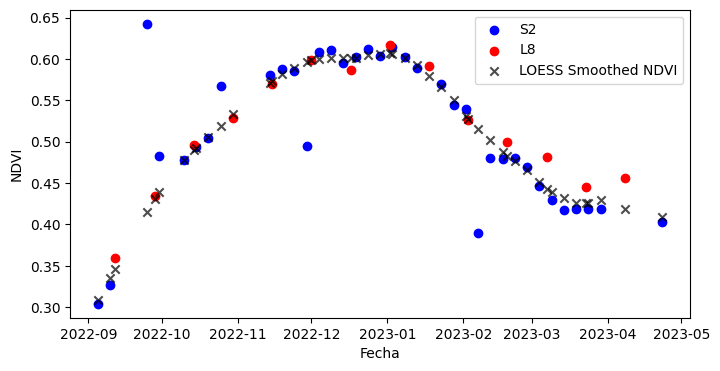

In [ ]:
# Grafica datos suavizados
plt.figure(figsize=(8, 4))

for satelite, color in zip(y['satelite'].unique(), ['blue', 'red']):
    subset = y[y['satelite'] == satelite]
    plt.scatter(subset['date'], subset['NDVI'], color=color, label=satelite)

plt.scatter(z['date'], z['smoothed_ndvi'], marker="x",c="black",
    alpha=0.7,label='LOESS Smoothed NDVI')
plt.xlabel('Fecha')
plt.ylabel('NDVI')
plt.legend()
plt.show()

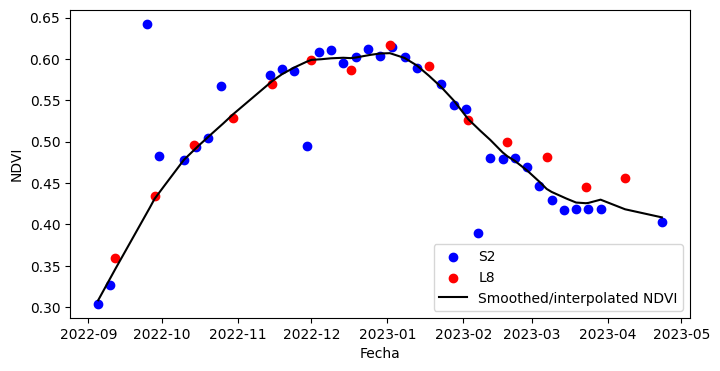

In [ ]:
# Grafica datos suavizados e interpolados
plt.figure(figsize=(8, 4))

for satelite, color in zip(y['satelite'].unique(), ['blue', 'red']):
    subset = y[y['satelite'] == satelite]
    plt.scatter(subset['date'], subset['NDVI'], color=color, label=satelite)

plt.plot(x['date'], x['ndvi_f'],
         label='Smoothed/interpolated NDVI', linestyle='-', c= "black")
plt.xlabel('Fecha')
plt.ylabel('NDVI')
plt.legend()
plt.show()

*Exportar tabla*

In [ ]:
interpolated.to_excel("df_indices.xlsx")

In [ ]:
from google.colab import files
files.download('df_indices.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>